In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score

In [33]:
def read_mss_results(mss):
    r_file = f"../results/tclr_model_testing/all/TD4_MSS{mss:0.2f}_RT_MS_exhaustive_new_hoover/results.pickle"
    with open(r_file, "rb") as f:
        results = pickle.load(f)
    return results

In [34]:
def combine_groups(results):
    g = results["groups"]
    df = results["train_data"]
    df["group"] = g
    return df
    

In [51]:
mss = 0.03
results = read_mss_results(mss)
df = combine_groups(results)

In [36]:
def plot_node_pcts(df):
    counts = df["group"].value_counts().sort_index() / df.shape[0]
    fig, ax = plt.subplots(1, 1, figsize=(19,10))
    counts.plot.bar(ax=ax)
    plt.show()

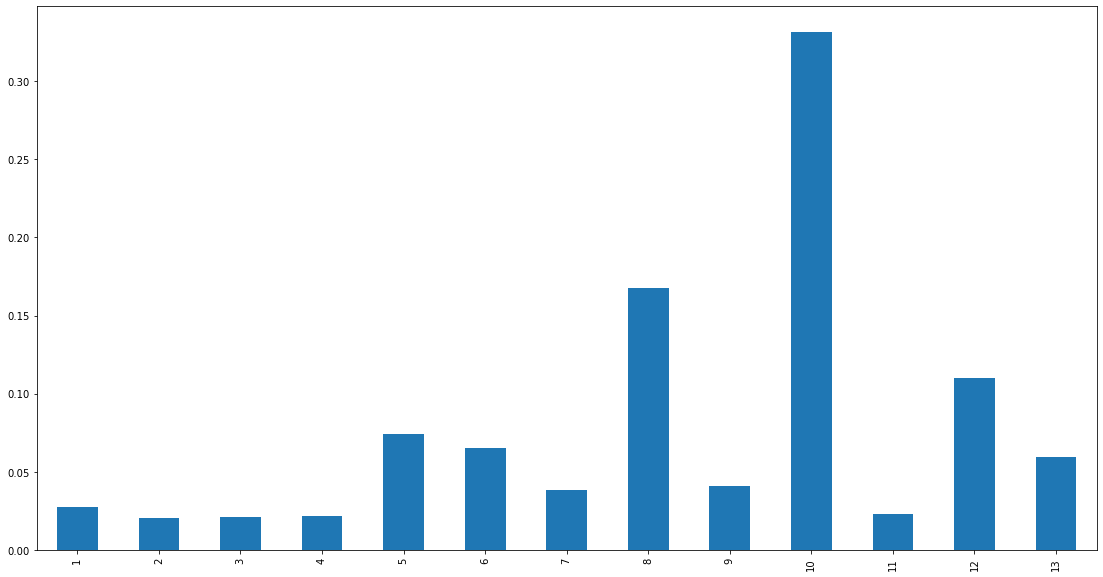

In [37]:
plot_node_pcts(df)

In [38]:
def find_single_res_bins(df):
    site_groups = df.groupby("site_name")["group"].value_counts().unstack()
    single_res_bins = site_groups.loc[:,site_groups.count(axis=0) == 1]
    return single_res_bins.dropna(axis=0, how="all")

In [39]:
def find_single_bin_res(df):
    site_groups = df.groupby("site_name")["group"].value_counts().unstack()
    single_bin_res = site_groups.loc[site_groups.count(axis=1) == 1, :]
    return single_bin_res.dropna(axis=1, how="all")

In [54]:
single_bin_res = find_single_bin_res(df)
single_res_bin = find_single_res_bins(df)

In [55]:
single_res_bin

group
site_name


In [49]:
single_res = ["GRAR", "Ocoee3", "WAN"]

In [50]:
idx = pd.IndexSlice
results["simmed_data"].loc[idx[single_res, :]].groupby("site_name").apply(lambda x: r2_score(x["actual"], x["model"]))

site_name
GRAR      0.942089
Ocoee3    0.650069
WAN       0.949705
dtype: float64

In [53]:
idx = pd.IndexSlice
results["simmed_data"].loc[idx[single_res, :]].groupby("site_name").apply(lambda x: r2_score(x["actual"], x["model"]))

site_name
GRAR      0.990343
Ocoee3    0.800211
WAN       0.947779
dtype: float64